In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title Function for Confusion Matrix Visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [ ]:
# please upgrade scikit-learn before running this notebook :)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn_pandas import DataFrameMapper, gen_features
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold

from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.manifold import TSNE

from sklearn import datasets
from matplotlib import offsetbox

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn import set_config
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import scipy.stats as ss

import warnings
import random

random.seed(2023)
seed = 2023

from IPython.display import set_matplotlib_formats
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Data Preparation

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1 Data Preparation and Cleaning

In [ ]:
path = "path to the file"
data = pd.read_csv(path, sep=",")
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative


We can see that the missing values are tagged as "?" question marks, so I will replace them with NaN values.

In [ ]:
data = data.replace("?", np.NaN)

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,NaN,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,NaN,f,NaN,f,NaN,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109,t,0.91,t,120,f,NaN,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,NaN,f,NaN,f,NaN,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,NaN,SVI,negative


In [ ]:
print("Shape:", data.shape)
print("Column Types Count:\n", data.dtypes.value_counts())

Shape: (3772, 30)
Column Types Count:
 object     29
float64     1
dtype: int64


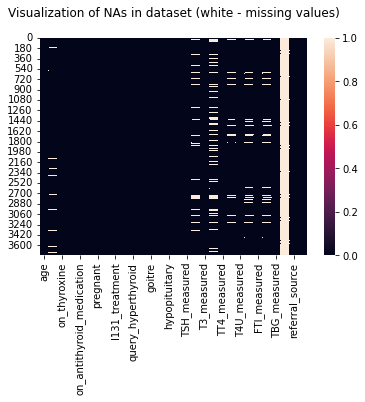

In [ ]:
sns.heatmap(data.isna());
plt.title('Visualization of NAs in dataset (white - missing values)\n');

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                           Total   Percent
TBG                         3772  1.000000
T3                           769  0.203871
T4U                          387  0.102598
FTI                          385  0.102068
TSH                          369  0.097826
TT4                          231  0.061241
sex                          150  0.039767
age                            1  0.000265
referral_source                0  0.000000
TBG_measured                   0  0.000000
FTI_measured                   0  0.000000
T4U_measured                   0  0.000000
TT4_measured                   0  0.000000
T3_measured                    0  0.000000
TSH_measured                   0  0.000000
psych                          0  0.000000
hypopituitary                  0  0.000000
tumor                          0  0.000000
goitre                         0  0.000000
lithium                        0  0.000000
query_hyperthyroid             0  0.000000
query_hypothyroid              0  0.000000
I131_treatm

We can see that for the column TBG we actually have no data so will drop the column. For the other columns we will impute the data.

In [ ]:
if "TBG" in data.columns:
  data = data.drop(["TBG"], axis=1)

I want to see all the columns.

In [ ]:
pd.set_option("display.max_columns", None)
data.head(n=5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,NaN,f,NaN,f,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109,t,0.91,t,120,f,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,NaN,f,NaN,f,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,SVI,negative


In [ ]:
continious_features = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
categorical_features = list(data.columns)
for col in continious_features:
  if col in categorical_features:
    categorical_features.remove(col)
if "Class" in categorical_features:
  categorical_features.remove("Class")
print("Continuous Features:", continious_features)
print("Categorical Features:", categorical_features)

Continuous Features: ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
Categorical Features: ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source']


I will change the type of continuous features to numerical.

In [ ]:
for column in continious_features:
  # if column == "age":
  #   data[column] = data[column].astype(dtype="int64", copy=True, errors="ignore")
  # else:
  data[column] = pd.to_numeric(data[column])

In [ ]:
print("Shape:", data.shape)
print("Column Types Count:\n", data.dtypes.value_counts())
print("Column Types:\n", data.dtypes)

Shape: (3772, 29)
Column Types Count:
 object     23
float64     6
dtype: int64
Column Types:
 age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
sick                          object
pregnant                      object
thyroid_surgery               object
I131_treatment                object
query_hypothyroid             object
query_hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured     

## 1.2 Separation of Test from the Dataset

In [ ]:
y = data["Class"]
X = data.drop(["Class"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed,
                                                    test_size = 0.25,
                                                    shuffle=True, stratify=y)
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

# 2. EDA and Transformation

In [ ]:
# training dataframe with target variable
df_train = pd.concat([X_train, y_train], axis=1)

In [ ]:
descriptive_stats = df_train.describe(include='all')
descriptive_stats

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
count,2828.000000,2704,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2546.000000,2829,2247.000000,2829,2651.000000,2829,2534.000000,2829,2535.000000,2829,2829,2829
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,5,4
top,NaN,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,NaN,t,NaN,t,NaN,t,NaN,t,NaN,f,other,negative
freq,NaN,1846,2471,2787,2800,2721,2783,2790,2780,2649,2648,2814,2801,2755,2828,2697,2546,NaN,2247,NaN,2651,NaN,2534,NaN,2535,NaN,2829,1654,2611
mean,51.673267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.209941,NaN,2.021246,NaN,108.705696,NaN,0.997459,NaN,110.765325,NaN,NaN,NaN
std,18.962478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.529942,NaN,0.829392,NaN,35.852517,NaN,0.194910,NaN,33.399415,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005000,NaN,0.050000,NaN,2.000000,NaN,0.250000,NaN,2.000000,NaN,NaN,NaN
25%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,1.600000,NaN,88.000000,NaN,0.880000,NaN,93.000000,NaN,NaN,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.400000,NaN,2.000000,NaN,104.000000,NaN,0.980000,NaN,107.000000,NaN,NaN,NaN
75%,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.600000,NaN,2.400000,NaN,125.000000,NaN,1.090000,NaN,125.000000,NaN,NaN,NaN


We can observe here that the column TBG_measured has 1 unique value, thus it will have 0 predictive power and I will drop that column as well.

In [ ]:
if "TBG_measured" in data.columns:
  df_train = df_train.drop(["TBG_measured"], axis=1)
  categorical_features.remove("TBG_measured")

We can also see that the target variable Class has 4 unique values, meaning that we are going to solve the problem for multiclass classification.

## 2.1 Target Value Analysis

In [ ]:
y_train.value_counts()

negative                   2611
compensated_hypothyroid     145
primary_hypothyroid          71
secondary_hypothyroid         2
Name: Class, dtype: int64

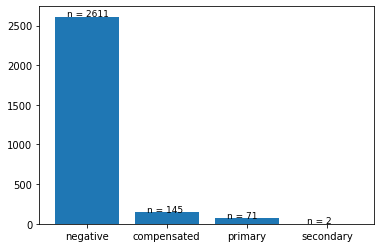

In [ ]:
height = [2611, 145, 71, 2]
bars = ["negative", "compensated", "primary", "secondary"]
y_pos = np.arange(len(bars))
label = ['n = 2611', 'n = 145', 'n = 71', 'n = 2']

plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
for i in range(len(bars)):
    plt.text(x = y_pos[i]-0.25 , y = height[i]+1, s = label[i], size = 9)

plt.show()

We can see that our target value is imbalanced.

## 2.2 Categorical encoding and imputation of missing values

In [ ]:
class RareLabelEncoder(BaseEstimator, TransformerMixin):
    """
    Find infrequent category levels and encode them to one value
    """

    def __init__(self, tol=0.05, n_categories=5, replace_with='Rare'):
        self.tol = tol
        self.replace_with = replace_with
        self.n_categories = n_categories

    def fit(self, X):
        self.cols = X.columns
        self.encoder_dict = {}

        for c in self.cols:
            if X[c].nunique() > self.n_categories:
                t = pd.Series(X[c].value_counts() / np.float(len(X)))
                freq_idx = t[t >= self.tol].index
                self.encoder_dict[c] = freq_idx

        return self


    def transform(self, X):
        for feature in self.cols:
            if feature in self.encoder_dict.keys():
                X[feature] = np.where(
                    X[feature].isin(self.encoder_dict[feature]),
                    X[feature],
                    self.replace_with,
                )
        return X

In [ ]:
set_config(transform_output="pandas")
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
     # using minmax scaler to have all the data in the range (0,1)
    ('scaler', MinMaxScaler())
])

cat_pipe = Pipeline([
    ('rare_label_enc', RareLabelEncoder()),
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('ohe', OneHotEncoder(drop='if_binary', sparse=False)),
    # to filter data that has very little variance thus will have little use in the models
    ('variance_trsh', VarianceThreshold(threshold=.97 * (1 - .97)))
])

pipe = ColumnTransformer(transformers=[
    ('cat', cat_pipe, categorical_features),
    ('num', num_pipe, continious_features),

], verbose_feature_names_out=False)

In [ ]:
y_train = df_train["Class"]
X_train = df_train.drop(["Class"], axis=1)

In [ ]:
X_train_tr = pipe.fit_transform(X_train)
X_test_tr = pipe.transform(X_test)

In [ ]:
pd.DataFrame(X_train_tr).describe(include='all')

,sex_F,sex_M,sex_unknown,on_thyroxine_t,sick_t,query_hypothyroid_t,query_hyperthyroid_t,psych_t,TSH_measured_t,T3_measured_t,TT4_measured_t,T4U_measured_t,FTI_measured_t,referral_source_SVHC,referral_source_SVI,referral_source_other,age,TSH,T3,TT4,T4U,FTI
count,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000
mean,0.652527,0.303287,0.044185,0.126546,0.038176,0.063627,0.063980,0.046660,0.899965,0.794274,0.937080,0.895723,0.896076,0.099682,0.275716,0.584659,0.544874,0.009821,0.186848,0.249312,0.361091,0.276757
std,0.476252,0.459760,0.205543,0.332523,0.191655,0.244130,0.244761,0.210946,0.300100,0.404303,0.242862,0.305674,0.305215,0.299628,0.446953,0.492868,0.203862,0.045696,0.070060,0.081088,0.089113,0.080447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.376344,0.001123,0.156398,0.203271,0.309179,0.234097
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.569892,0.003009,0.186848,0.242991,0.361091,0.274809
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.709677,0.006972,0.203791,0.282710,0.396135,0.307888
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train_tr.shape

(2829, 22)

In [ ]:
y_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('ohe', OneHotEncoder(sparse=False))
])

In [ ]:
y_train_tr = y_pipe.fit_transform(np.array(y_train).reshape(-1, 1))

## 2.3 Correlations

### Continuous

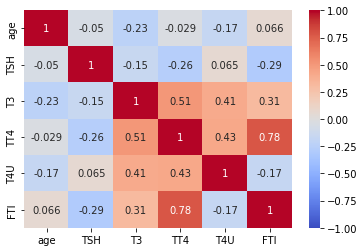

In [ ]:
corr = X_train_tr[continious_features].corr()
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True)

Only "FTI" and "TT4" are strongly correlated, but still I will not drop any of the columns as it may still add some predictive power.

### Categorical

In [ ]:
cat_var1 = list(X_train_tr.columns)
for cont in continious_features:
  if cont in cat_var1:
    cat_var1.remove(cont)
cat_var2 = cat_var1.copy()
## Let us jump to Chi-Square test
## Creating all possible combinations between the above two variables list
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

In [ ]:
result = []
for i in cat_var_prod:
  if i[0] != i[1]: #and list(ss.chi2_contingency(pd.crosstab(X_train_tr[i[0]], X_train_tr[i[1]])))[1] > 0.05:
    result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            X_train_tr[i[0]], X_train_tr[i[1]])))[1]))

In [ ]:
chi_test_output = pd.DataFrame(result, columns = ["var1", "var2", "coeff"])

chi_test_output.pivot(index="var1", columns="var2", values="coeff")

var2,FTI_measured_t,T3_measured_t,T4U_measured_t,TSH_measured_t,TT4_measured_t,on_thyroxine_t,psych_t,query_hyperthyroid_t,query_hypothyroid_t,referral_source_SVHC,referral_source_SVI,referral_source_other,sex_F,sex_M,sex_unknown,sick_t
var1,,,,,,,,,,,,,,,,
FTI_measured_t,NaN,1.699340e-48,0.000000e+00,3.411576e-157,0.000000e+00,6.430449e-03,7.087025e-03,3.529136e-01,0.117224,3.366625e-07,6.819665e-16,1.219962e-31,7.722059e-02,1.789287e-02,2.927291e-01,0.681556
T3_measured_t,1.699340e-48,NaN,3.712551e-48,2.133896e-126,8.881198e-115,1.675681e-14,5.847040e-07,2.004300e-01,0.000433,1.589631e-12,4.359097e-38,1.012296e-67,1.549800e-04,5.785008e-04,3.400172e-01,0.945516
T4U_measured_t,0.000000e+00,3.712551e-48,NaN,1.720730e-156,0.000000e+00,6.063742e-03,6.886173e-03,3.620444e-01,0.114057,3.145827e-07,1.694282e-15,3.532440e-31,9.293914e-02,2.314471e-02,2.995732e-01,0.691021
TSH_measured_t,3.411576e-157,2.133896e-126,1.720730e-156,NaN,1.445997e-272,2.108594e-03,5.062423e-04,1.506593e-03,0.000526,7.547999e-08,2.704994e-24,1.026583e-43,1.539312e-01,6.920047e-02,5.428768e-01,1.000000
TT4_measured_t,0.000000e+00,8.881198e-115,0.000000e+00,1.445997e-272,NaN,1.018107e-01,4.163311e-03,2.444355e-02,0.064607,2.689462e-05,2.855379e-15,3.139568e-26,1.652456e-03,7.625954e-05,1.708212e-01,0.274447
on_thyroxine_t,6.430449e-03,1.675681e-14,6.063742e-03,2.108594e-03,1.018107e-01,NaN,1.397878e-04,4.313831e-01,0.000002,2.868073e-07,4.298118e-23,5.069825e-36,1.546440e-10,1.564609e-09,2.347142e-01,0.015942
psych_t,7.087025e-03,5.847040e-07,6.886173e-03,5.062423e-04,4.163311e-03,1.397878e-04,NaN,3.800435e-03,0.742741,4.774194e-192,8.096463e-08,1.688630e-33,1.595610e-06,3.384264e-08,3.116546e-01,0.099666
query_hyperthyroid_t,3.529136e-01,2.004300e-01,3.620444e-01,1.506593e-03,2.444355e-02,4.313831e-01,3.800435e-03,NaN,0.209897,5.146210e-04,5.637723e-06,6.432842e-08,1.754552e-03,1.188766e-03,1.000000e+00,0.171583
query_hypothyroid_t,1.172241e-01,4.326599e-04,1.140567e-01,5.257654e-04,6.460678e-02,1.579923e-06,7.427409e-01,2.098965e-01,NaN,1.518648e-02,3.766730e-01,1.705581e-02,5.828728e-03,1.821144e-02,3.578121e-01,0.062821


These are the p-values of the Chi-test performed in between the categorical variables. The values less than 0.05 reject the null hypothesis that the variables are independent and there may be correlation between the 2 categorical variables. I still will not drop any of the columns as we do not have an overwhelming quantity of features.

## 2.4 SMOTE

I will generate some new data for the classes that had vary few data points.

In [ ]:
strategy = {"negative":2611, "compensated_hypothyroid":145, "primary_hypothyroid":71, "secondary_hypothyroid":36}
sm = SMOTE(k_neighbors=1, sampling_strategy=strategy, random_state=seed)
X_res, y_res = sm.fit_resample(X_train_tr, y_train)

I decided to add as little as possible synthetic data, not to diverge from original distribution, just to make sure that there is enough data in each k-fold for learning and testing.

In [ ]:
y_res.value_counts()

negative                   2611
compensated_hypothyroid     145
primary_hypothyroid          71
secondary_hypothyroid        36
Name: Class, dtype: int64

# 3. Models

## 3.1 Logistic Regression without Regularization

In [ ]:
# Variables for average classification report
originalclass_lr = []
predictedclass_lr = []

#Make our custom score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass_lr.extend(y_true)
    predictedclass_lr.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

clf = LogisticRegression(random_state=seed)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=X_res, y=y_res, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass_lr, predictedclass_lr))

                         precision    recall  f1-score   support

compensated_hypothyroid       1.00      0.01      0.01       145
               negative       0.93      1.00      0.96      2611
    primary_hypothyroid       0.97      0.48      0.64        71
  secondary_hypothyroid       0.73      0.22      0.34        36

               accuracy                           0.93      2863
              macro avg       0.91      0.43      0.49      2863
           weighted avg       0.93      0.93      0.90      2863



## 3.2 Logistic Regression with Regularization

In [ ]:
# Variables for average classification report
originalclass_lr = []
predictedclass_lr = []

#Make our custom score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass_lr.extend(y_true)
    predictedclass_lr.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

clf = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    random_state=seed)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=X_res, y=y_res, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass_lr, predictedclass_lr))

                         precision    recall  f1-score   support

compensated_hypothyroid       0.88      0.05      0.09       145
               negative       0.94      1.00      0.97      2611
    primary_hypothyroid       0.92      0.79      0.85        71
  secondary_hypothyroid       0.93      0.36      0.52        36

               accuracy                           0.94      2863
              macro avg       0.91      0.55      0.61      2863
           weighted avg       0.93      0.94      0.91      2863



We got very bad recall result on both cases with Logistic Regression. Lets see if KNN can solve that issue.

## 3.3 K-Nearest Neighbors

In [ ]:
# Variables for average classification report
originalclass_lr = []
predictedclass_lr = []

#Make our custom score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass_lr.extend(y_true)
    predictedclass_lr.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

clf = KNeighborsClassifier()

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=X_res, y=y_res, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass_lr, predictedclass_lr))

                         precision    recall  f1-score   support

compensated_hypothyroid       0.17      0.03      0.05       145
               negative       0.94      0.99      0.96      2611
    primary_hypothyroid       0.93      0.37      0.53        71
  secondary_hypothyroid       0.92      1.00      0.96        36

               accuracy                           0.93      2863
              macro avg       0.74      0.60      0.62      2863
           weighted avg       0.90      0.93      0.91      2863



Still the results are not satisfactory as the compensated_hypothyroid class has very low precision and recall.

# 4. Feature Importance and Hyperparameters Tuning

## 4.1 Feature Importance

### Logistic Regression

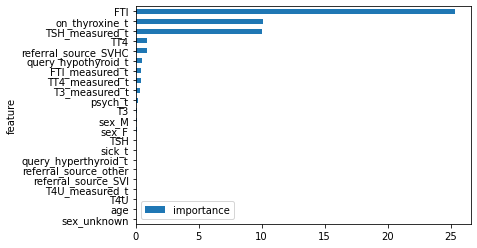

In [ ]:
model = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
    random_state=seed)
model.fit(X_res, y_res)
w = list(model.coef_[0])
features = X_res.columns

feature_importance = pd.DataFrame(features, columns = ["feature"])
feature_importance["importance"] = list(map(lambda x:pow(x,2),w))# I used square weights to have all of them on the positive side
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)

ax = feature_importance.plot.barh(x="feature", y="importance")
plt.show()

### Random Forest

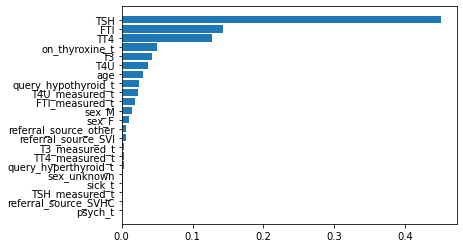

In [ ]:
model = RandomForestClassifier()

model.fit(X_res, y_res)

importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_res.columns)[indices])

## 4.2 Hyperparameters Tuning

### Logistic Regression

In [ ]:
grid = {"penalty": ["l1", "l2"],
        "solver": ["liblinear", "saga"],
        "tol": list(np.arange(0.0001, 0.001, 0.0001))}

logreg = LogisticRegression()
gs = GridSearchCV(logreg,
                  param_grid = grid,
                  scoring='accuracy',
                  cv=5)

In [ ]:
gs.fit(X_res, y_res)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga'],
                         'tol': [0.0001, 0.0002, 0.00030000000000000003, 0.0004,
                                 0.0005, 0.0006000000000000001,
                                 0.0007000000000000001, 0.0008,
                                 0.0009000000000000001]},
             scoring='accuracy')

In [ ]:
lr_bp = gs.best_params_
lr_bp

{'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}

In [ ]:
# Variables for average classification report
originalclass_lr = []
predictedclass_lr = []

#Make our custom score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass_lr.extend(y_true)
    predictedclass_lr.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

clf = LogisticRegression(**gs.best_params_)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=X_res, y=y_res, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass_lr, predictedclass_lr))

                         precision    recall  f1-score   support

compensated_hypothyroid       0.58      0.05      0.09       145
               negative       0.94      1.00      0.97      2611
    primary_hypothyroid       0.91      0.73      0.81        71
  secondary_hypothyroid       0.85      0.47      0.61        36

               accuracy                           0.94      2863
              macro avg       0.82      0.56      0.62      2863
           weighted avg       0.92      0.94      0.92      2863



The Logistic Regression still does not perform much better.

### K-Nearest Neighbors

In [ ]:
grid = {"n_neighbors": range(1, 13, 2),
        "p": [1, 2]}

knn = KNeighborsClassifier()
gs = GridSearchCV(knn,
                  param_grid = grid,
                  scoring='accuracy',
                  cv=5)

In [ ]:
gs.fit(X_res, y_res)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 13, 2), 'p': [1, 2]},
             scoring='accuracy')

In [ ]:
gs.best_params_

{'n_neighbors': 9, 'p': 1}

In [ ]:
# Variables for average classification report
originalclass_lr = []
predictedclass_lr = []

#Make our custom score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass_lr.extend(y_true)
    predictedclass_lr.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

clf = KNeighborsClassifier(**gs.best_params_)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=X_res, y=y_res, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass_lr, predictedclass_lr))

                         precision    recall  f1-score   support

compensated_hypothyroid       0.38      0.02      0.04       145
               negative       0.93      1.00      0.96      2611
    primary_hypothyroid       0.95      0.28      0.43        71
  secondary_hypothyroid       1.00      0.92      0.96        36

               accuracy                           0.93      2863
              macro avg       0.81      0.55      0.60      2863
           weighted avg       0.90      0.93      0.90      2863



Again very bad performance for the class compensated_hypothyroid.

### Decision Tree

In [ ]:
grid = {"criterion": ["gini", "entropy", "log_loss"],
        "max_depth": np.arange(10, 40, 3)}

tree = DecisionTreeClassifier()
gs = GridSearchCV(tree,
                  param_grid = grid,
                  scoring='accuracy',
                  cv=5)

In [ ]:
gs.fit(X_res, y_res)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([10, 13, 16, 19, 22, 25, 28, 31, 34, 37])},
             scoring='accuracy')

In [ ]:
tree_bp = gs.best_params_
tree_bp

{'criterion': 'gini', 'max_depth': 22}

In [ ]:
# Variables for average classification report
originalclass_lr = []
predictedclass_lr = []

# Make our custom score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass_lr.extend(y_true)
    predictedclass_lr.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

clf = DecisionTreeClassifier(**gs.best_params_)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=X_res, y=y_res, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass_lr, predictedclass_lr))

                         precision    recall  f1-score   support

compensated_hypothyroid       0.95      0.98      0.96       145
               negative       1.00      1.00      1.00      2611
    primary_hypothyroid       0.94      0.92      0.93        71
  secondary_hypothyroid       0.97      0.97      0.97        36

               accuracy                           0.99      2863
              macro avg       0.96      0.97      0.97      2863
           weighted avg       0.99      0.99      0.99      2863



We got much better results with the decision tree according to all parameters.

### Gradient Boosting

In [ ]:
grid = {"loss": ["log_loss", "deviance", "exponential"],
        "max_depth": np.arange(2, 6, 1),
        "criterion": ["friedman_mse", "squared_error"]}

gbc = GradientBoostingClassifier()
gs = GridSearchCV(gbc,
                  param_grid = grid,
                  scoring='accuracy',
                  cv=5)

In [ ]:
gs.fit(X_res, y_res)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': array([2, 3, 4, 5])},
             scoring='accuracy')

In [ ]:
gs.best_params_

{'criterion': 'friedman_mse', 'loss': 'log_loss', 'max_depth': 5}

In [ ]:
# Variables for average classification report
originalclass_lr = []
predictedclass_lr = []

#Make our custom score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass_lr.extend(y_true)
    predictedclass_lr.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

clf = GradientBoostingClassifier(**gs.best_params_)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=X_res, y=y_res, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass_lr, predictedclass_lr))

                         precision    recall  f1-score   support

compensated_hypothyroid       0.94      1.00      0.97       145
               negative       1.00      1.00      1.00      2611
    primary_hypothyroid       0.96      0.93      0.94        71
  secondary_hypothyroid       0.97      0.97      0.97        36

               accuracy                           0.99      2863
              macro avg       0.97      0.97      0.97      2863
           weighted avg       0.99      0.99      0.99      2863



Again very good, quite similar results in comparison to the results of the Decision Tree. Although, the Decision Tree algorithm is simpler.

# 5. Results

In the results section I will test the 2 best models (one from the those mention in the task and one from the other models used) on the test data that was not used in the analysis to see how good predictive power they offer for the unseen data.

### Logistic Regression

                         precision    recall  f1-score   support

compensated_hypothyroid       1.00      0.02      0.04        49
               negative       0.95      1.00      0.97       870
    primary_hypothyroid       0.83      0.83      0.83        24
  secondary_hypothyroid       0.00      0.00      0.00         0

               accuracy                           0.94       943
              macro avg       0.69      0.46      0.46       943
           weighted avg       0.95      0.94      0.92       943

                                        Confusion Matrix


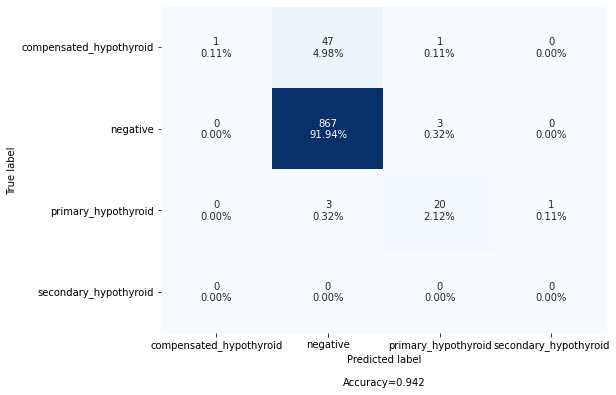

In [ ]:
clf = LogisticRegression(**lr_bp)
clf.fit(X_res, y_res)
originalclass_lr = y_test
predictedclass_lr = clf.predict(X_test_tr)
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["compensated_hypothyroid", "negative", "primary_hypothyroid", "secondary_hypothyroid"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

### Decision Tree

                         precision    recall  f1-score   support

compensated_hypothyroid       0.92      0.98      0.95        49
               negative       1.00      0.99      0.99       870
    primary_hypothyroid       0.92      0.92      0.92        24
  secondary_hypothyroid       0.00      0.00      0.00         0

               accuracy                           0.99       943
              macro avg       0.71      0.72      0.72       943
           weighted avg       0.99      0.99      0.99       943

                                        Confusion Matrix


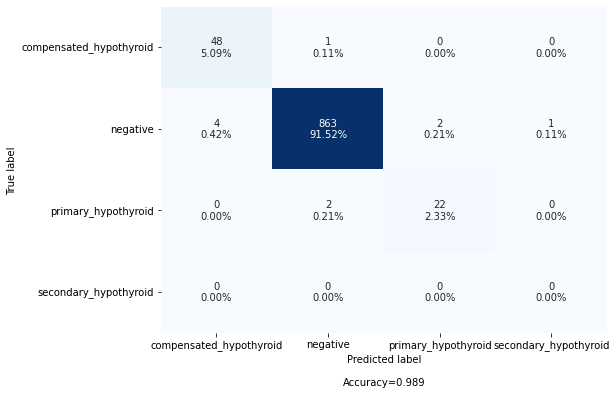

In [ ]:
clf = DecisionTreeClassifier(**tree_bp)
clf.fit(X_res, y_res)
originalclass_lr = y_test
predictedclass_lr = clf.predict(X_test_tr)
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["compensated_hypothyroid", "negative", "primary_hypothyroid", "secondary_hypothyroid"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

We can see that the Decision Tree performed on the unseen data almost as good as it was performing on the validation set. Thus I would choose the Decision Tree for its simplicity and very high performance for our data. Macro average is low as we do not have and class secondary_hypothyroid. The metric does not work for this case, so we can just ignore it.